# An introduction to plotnine:  graphs that make sense and that you can use in widgets.

A graphics package based on the grammar of graphics.
* Adapted from the `ggplot` package in R.
* Learning the basic concepts makes it easy to make complicated plots by adding layers.
* The `ggformula` package you used to make graphs in Business Stats is based on this same idea.
* This will be the same graphics framework used in Applied Statistical Modeling, a required class for the Business Analytics concentration.
* It is built on top of *matplotlib*, a popular graphing package for Python, but its commands are designed to be consistent with the grammar of graphics.

## Installing plotnine

Copy and paste the line below into Terminal/Anaconda Prompt, and type 'y' when prompted:

```
conda install -c conda-forge plotnine
```

## Running plotnine in Jupyter Lab

Any Jupyter notebook running plotnine must import the package.

In [ ]:
import plotnine as p9

We'll also get some data to practice with--the mpg data set is built into plotnine.data, but you can use pandas to import any other data frame.

In [ ]:
from plotnine.data import mpg # data about cars and their fuel efficiency
mpg  # display a snippet of the dataframe

## Components of a plot

All the instructions below will refer to ggplot2, which is the underlying basis of plotnine.

Every ggplot2 plot has three key components:
1. data,
2.  a set of aesthetic mappings between variables in the data and how those variables are displayed visually
3.  At least one layer which describes how to render the variables in a plot.

<div>
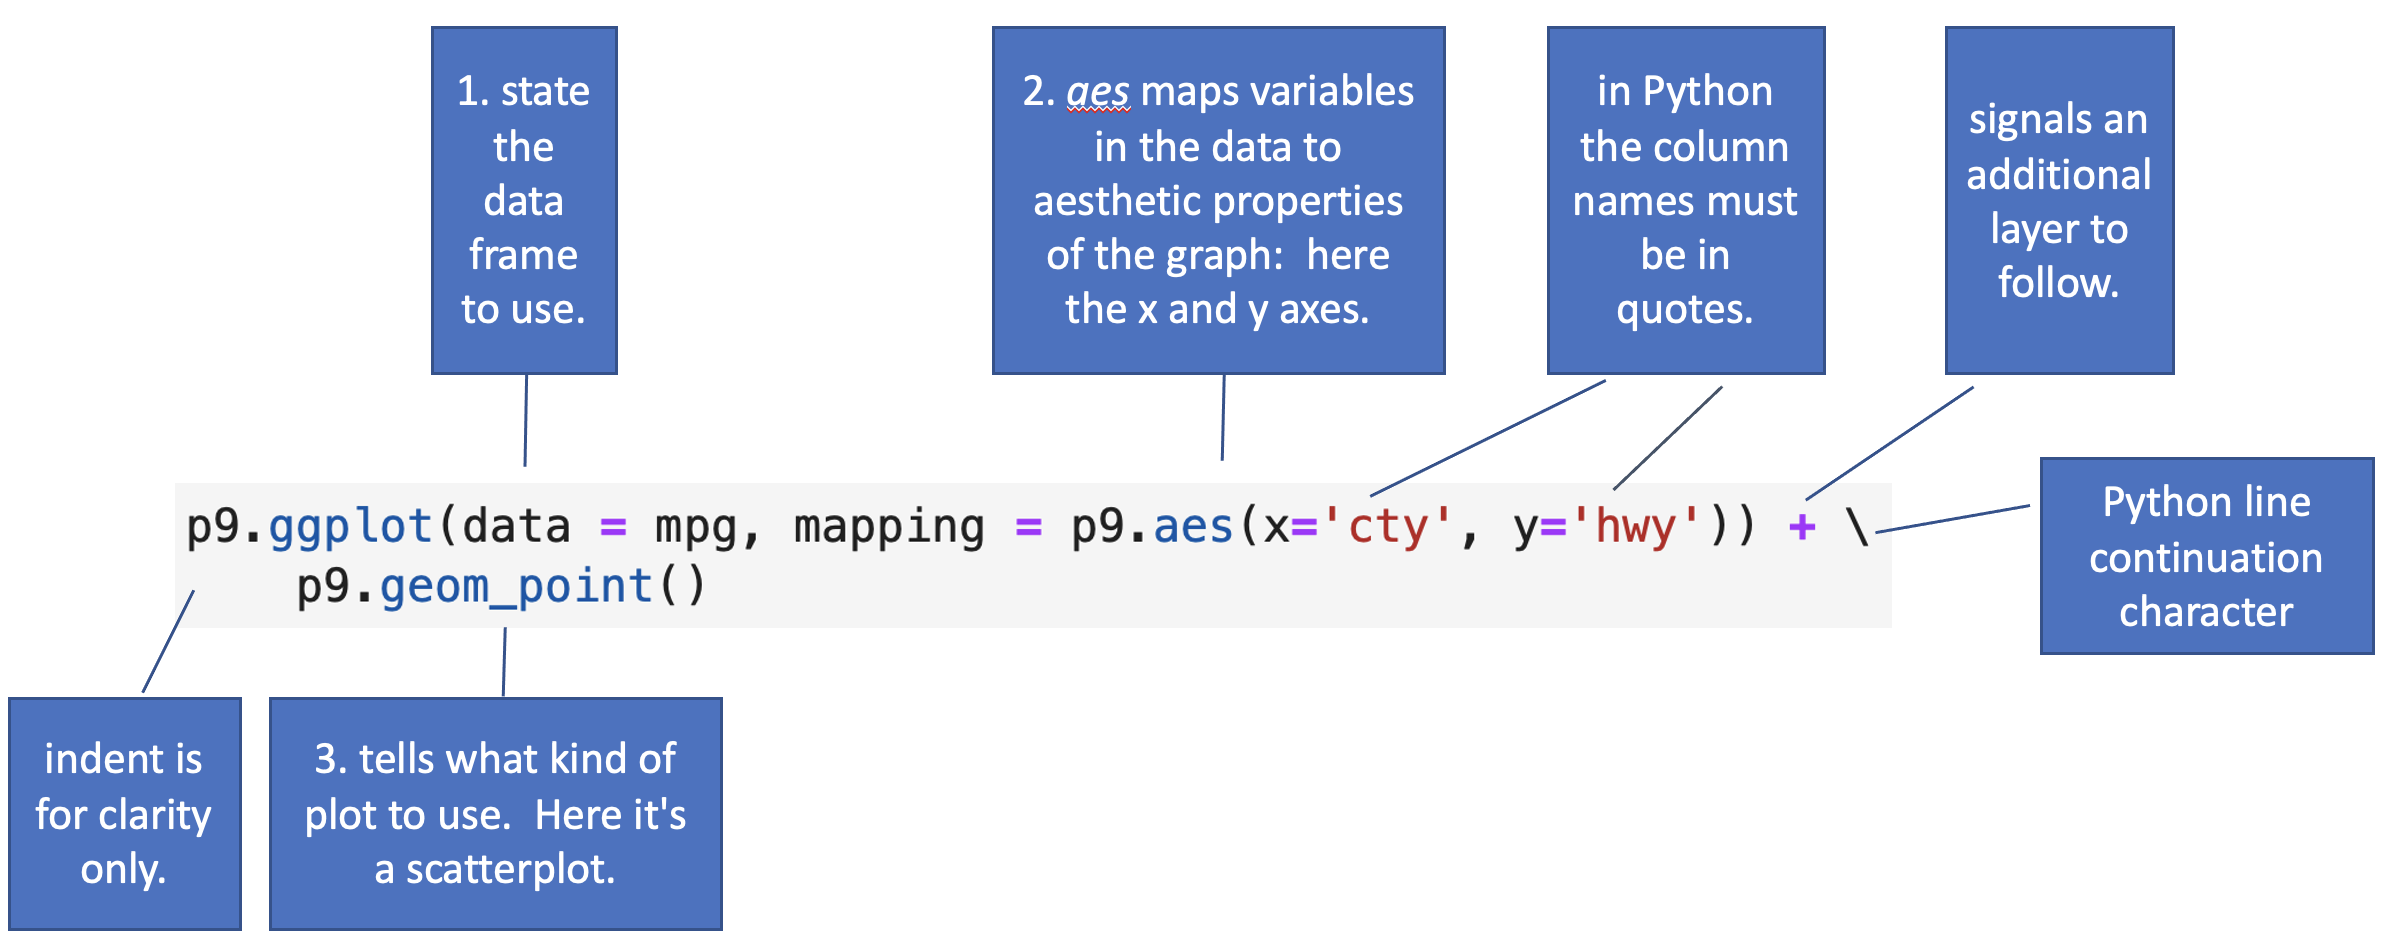
</div>

The commands above make a scatterplot of the columns 'cty' (miles per gallon in the city) vs. 'hwy' (miles per gallon on the highway).  Run the cell below to see this.  'cty' is mapped to the x-axis, and 'hwy' is mapped to the y-axis.

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy')) + \
    p9.geom_point()    

### Adding information from more variables to the plot

#### Color

Let's say we now wanted to identify the points on the graph by the class of car it is:  compact, midsize, etc.  We can map the variable 'class' to another aesthetic attribute, in this case color.

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy', color = 'class')) + \
    p9.geom_point()

Color can also be mapped to a continuous variable, like 'displ' (engine displacement).  Notice the difference in the scale.

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy', color = 'displ')) + \
    p9.geom_point()

#### Size

You can map the size of a point to a continuous variable.  (It's not generally recommended for categorical variables.)

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy', size = 'displ')) + \
    p9.geom_point()

#### Shape

Mapping the shape of a point to a variable should generally only be used for nominal categorical variables.

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy', shape = 'class')) + \
    p9.geom_point()    

#### Forcing a variable to be treated as a categorical variable

Python will automatically interpret the variable 'year' as a numeric variable.  But if we'd like to treat it as a categorical variable we can use `factor(year)`.

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy', shape = 'factor(year)')) + \
    p9.geom_point()    

### Additional layers

To overlay a linear line of best fit you can add the layer with the line to the graph.  Add a line continuation character (backslash) after each +.

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty', y='hwy')) + \
    p9.geom_point() + \
    p9.geom_smooth(method = 'lm', se = False)  # method = 'lm' says to use linear regression; se = False will remove confidence band

## Non-scatterplot graphs for numeric variables

### Histograms

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='cty')) + \
    p9.geom_histogram(bins = 10)

### Side-by-side boxplots

The variable that defines the groups must be a categorical variable.

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='drv', y='cty')) + \
    p9.geom_boxplot()

## Graphs for categorical variables

### Bar charts

Bar charts are for categorical variables.  If you use a numeric variable instead it will automatically convert your numeric variable to a categorical one.


In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='class')) + \
    p9.geom_bar()

#### Two-variable bar charts

You can also specify a second variable in a bar chart using the `fill` aesthetic.  Here the fill variable is 'fl', or fuel type.

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='class', fill = 'fl')) + \
    p9.geom_bar()

#### Two-variable standardized bar charts

To make each bar 100%, add the parameter `position = "fill"` to your geom_bar() command (remember that from Business Stats?).

In [ ]:
p9.ggplot(data = mpg, mapping = p9.aes(x='class', fill = 'fl')) + \
    p9.geom_bar(position = "fill")

## Add titles and axis labels

Add `p9.labs` as a layer to your graph.  You can add a title, or you can add a label for any aesthetic mapping that you used in the graph.

In [ ]:

p9.ggplot(data = mpg, mapping = p9.aes(x='class', fill = 'fl')) + \
    p9.geom_bar() +\
    p9.labs(x = "Car class", y = "Number of cars", fill = 'Fuel type', \
            title = "Distribution of cars by class")

## Printing graphs on output widgets

In the example below I make a select widget for the user to select a variable name, and then change the graph accordingly.  (I am not claiming this is a great use of widgets or an exemplary graph!)

Important lines:
* line 20:  make the graph and assign it a name.  I use the value of the select widget as the x-variable name.
* lines 23-24:  use p.draw(show = True) to get the graph to show up on the output widget.

In [ ]:
#%matplotlib inline
import ipywidgets as widgets
import plotnine as p9
from plotnine.data import mpg

var_names = list(mpg)  # get names of variables from data frame.

# 1. Define our output widgets and select widget
main_out = widgets.Output()
graph_out = widgets.Output(layout={'border': '1px dashed black'})
var_w = widgets.Select(
    options=var_names,  # options as list of label-value pairs
    value=None,  # default value
    description='Choose your x-variable:'
)

# 2.Define the function to be called when the user selects a different variable
def when_var_selected(change):
    graph_out.clear_output(wait = True)
    p=p9.ggplot(data = mpg, mapping = p9.aes(x=var_w.value, fill = 'fl')) + \
            p9.geom_bar() + \
            p9.labs(title = f"Bar Chart of {var_w.value}")
    with graph_out:
        p.draw(show = True)
        
# 3. Link the widget and the function
var_w.observe(when_var_selected,names='value')  #names = 'value' tells Python to change the *value* of the button.

# 4. Display the widgets
with main_out:
    display(var_w)
    display(graph_out)

main_out